In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model SIR


$$
\frac{\boldsymbol{dS}}{\boldsymbol{dt}}=-\frac{\boldsymbol{\beta I S}}{N} \\
\frac{\boldsymbol{dI}}{\boldsymbol{dt}}=\frac{\boldsymbol{\beta I S}}{N}-\gamma I \\
\frac{\boldsymbol{dR}}{\boldsymbol{dt}}=\gamma I
$$

- $S$ - liczba osób podatnych
- $I$ - liczba osób chorych
- $R$ - liczba osób odpornych 
- $N=S+I+R$, liczba osób w populacji

Współczynniki:

In [36]:
gamma = 1 # współczynnik "szybkości" zdrowienia

betas = [0.5, 0.98, 1.02, 1.5, 3.] # współczynnik "szybkości" zarażania

$R_{0} = \frac{\beta}{\gamma}$, basic reproduction ratio - współczynnik mówiący o dynamice epidemii (teoretyczna liczba osób, której każdy chory przekazuje zakażenie przy założeniu, że wszystkie kontakty osoby chorej następują z osobami podatnymi na zakażenie)

Ustawienia solvera:

In [3]:
T = 20 #czas symulacji
N_iter = 1000 #liczba iteracji
dt = T/N_iter #krok czasowy
time = dt * np.arange(N_iter) 

Warunki początkowe:

In [4]:
N = 500 # wielkość populacji
I0 = 1 # liczba zarażonych
S0 = N - I0 # liczba podatnych
R_start = 0 # liczba odpornych
IC = [S0, I0, R_start, N]

Funkcja rozwiązująca równania (schemat Eulera explicit):

In [5]:
def SIR_explicit(beta, gamma, N_iter, dt, initial_cond):
    S = np.zeros(N_iter)
    I = np.zeros(N_iter)
    R = np.zeros(N_iter)

    S[0] = initial_cond[0]
    I[0] = initial_cond[1]
    R[0] = initial_cond[2]
    N = initial_cond[3]

    for i in range(N_iter - 1):
        S[i+1] = S[i] + (- (beta * I[i] * S[i])/N) * dt
        I[i+1] = I[i] + ((beta * I[i] * S[i])/N - gamma * I[i]) *dt
        R[i+1] = R[i] + (gamma * I[i]) * dt
        
    return S, I, R

Funkcja rysująca wykres:

In [6]:
def draw_plot(S, I, R, time, beta, gamma):
    plt.plot(time, S, label="S - liczba podatnych")
    plt.plot(time, I, label="I - liczba chorych")
    plt.plot(time, R, label="R - liczba odpornych")
    plt.title("R_0=" + str((beta/gamma)))
    plt.xlabel("Time")
    plt.ylabel("S, I, R")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

## Rozwiązania dla różnych wartości współczynnika $\beta$:

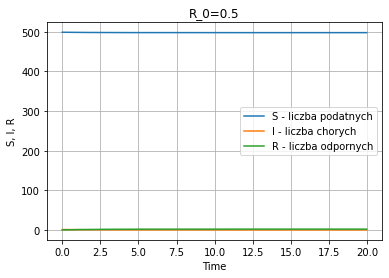

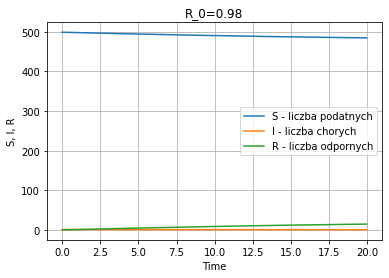

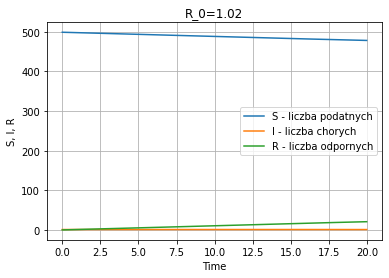

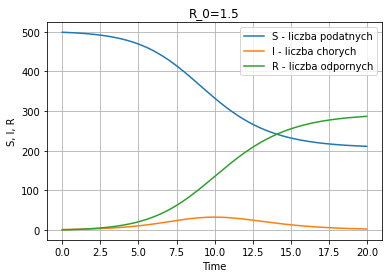

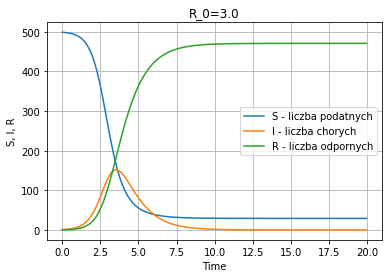

In [37]:
for beta in betas:
    S, I, R = SIR_explicit(beta, gamma, N_iter, dt, IC)
    draw_plot(S, I, R, time, beta, gamma)

## Wnioski: 

O szybkości zarażania decyduje współczynnik $\beta$. Dynamikę zdrowienia reprezentuje współczynnik $\gamma$. Zatem, aby epidemia się rozwinęła, musi być spełniony warunek $\beta>\gamma$. Wynika z tego, że epidemia w tym modelu szybciej narasta, niż opada.